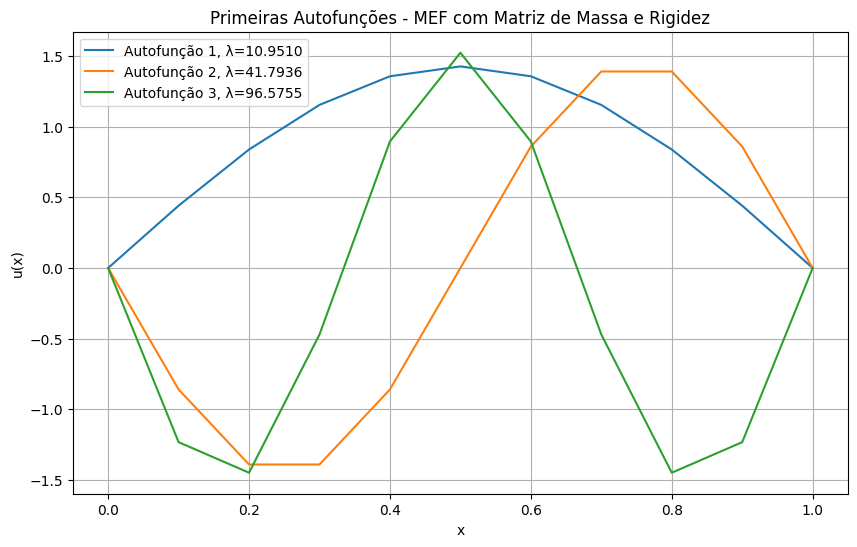

In [15]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Parâmetros iniciais
n_elements = 10
n_nodes = n_elements + 1
L = 1.0
x_nodes = np.linspace(0, L, n_nodes)
h = L / n_elements

# Inicializando matrizes globais
K_global = np.zeros((n_nodes, n_nodes))
B_global = np.zeros((n_nodes, n_nodes))

# Construindo as matrizes globais
for e in range(n_elements):
    x_e1, x_e2 = x_nodes[e], x_nodes[e + 1]

    # Matriz de rigidez local
    K_local = np.array([[1/h + h/3, -1/h + h/6], [-1/h + h/6, 1/h + h/3]])

    # Matriz de massa local
    B_local = np.array([[h/3, h/6], [h/6, h/3]])

    # Assemble global matrices
    for i in range(2):
        for j in range(2):
            K_global[e + i, e + j] += K_local[i, j]
            B_global[e + i, e + j] += B_local[i, j]

# Aplicando condições de contorno (Dirichlet: u(0) = u(1) = 0)
K_reduced = K_global[1:-1, 1:-1]
B_reduced = B_global[1:-1, 1:-1]

# Resolvendo o problema generalizado de autovalores para K.u(x) = λ.B.u(x)
eigenvalues, eigenvectors = la.eigh(K_reduced, B_reduced)

# Plot das primeiras autofunções
plt.figure(figsize=(10, 6))
for i in range(3):  # Exibindo as 3 primeiras autofunções
    autofuncao = np.zeros(n_nodes)
    autofuncao[1:-1] = eigenvectors[:, i]
    plt.plot(x_nodes, autofuncao, label=f'Autofunção {i+1}, λ={eigenvalues[i]:.4f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Primeiras Autofunções - MEF com Matriz de Massa e Rigidez')
plt.grid(True)
plt.show()


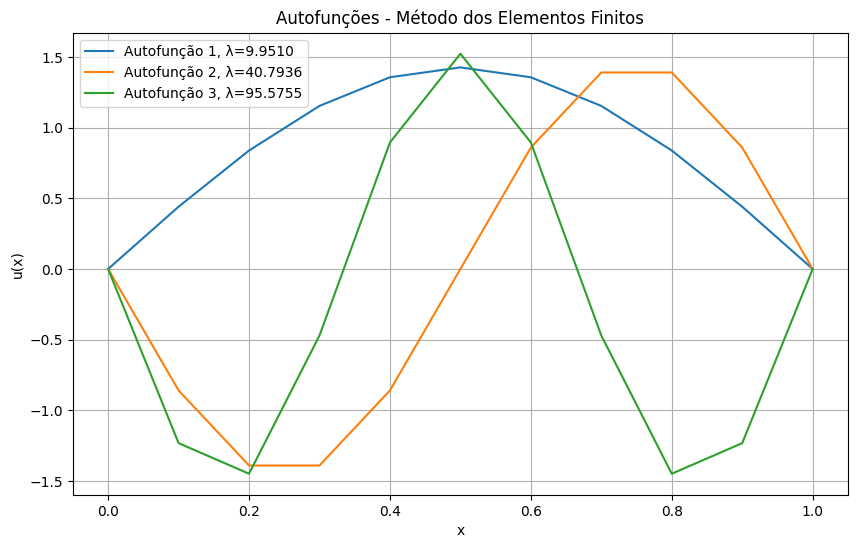

In [16]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Número de elementos
n_elements = 10
# Número total de nós
n_nodes = n_elements + 1
# Comprimento total
L = 1.0
# Comprimento de cada elemento
h = L / n_elements

# Inicialização das matrizes globais
K_global = np.zeros((n_nodes, n_nodes))
M_global = np.zeros((n_nodes, n_nodes))

# Montagem das matrizes locais
for e in range(n_elements):
    # Matriz de rigidez local para um elemento linear
    K_local = np.array([[1, -1], [-1, 1]]) * (1/h)
    
    # Matriz de massa local para um elemento linear
    M_local = np.array([[2, 1], [1, 2]]) * (h/6)
    
    # Montagem nas matrizes globais
    for i in range(2):
        for j in range(2):
            K_global[e + i, e + j] += K_local[i, j]
            M_global[e + i, e + j] += M_local[i, j]

# Condições de contorno: removendo a primeira e última linhas e colunas
K_global_reduced = K_global[1:-1, 1:-1]
M_global_reduced = M_global[1:-1, 1:-1]

# Resolvendo o problema de autovalores generalizado
eigenvalues, eigenvectors = la.eigh(K_global_reduced, M_global_reduced)

# Plot das autofunções
plt.figure(figsize=(10, 6))
for i in range(3):  # Mostrar as três primeiras autofunções
    autofuncao = np.zeros(n_nodes)
    autofuncao[1:-1] = eigenvectors[:, i]
    plt.plot(np.linspace(0, L, n_nodes), autofuncao, label=f'Autofunção {i+1}, λ={eigenvalues[i]:.4f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Autofunções - Método dos Elementos Finitos')
plt.grid(True)
plt.show()


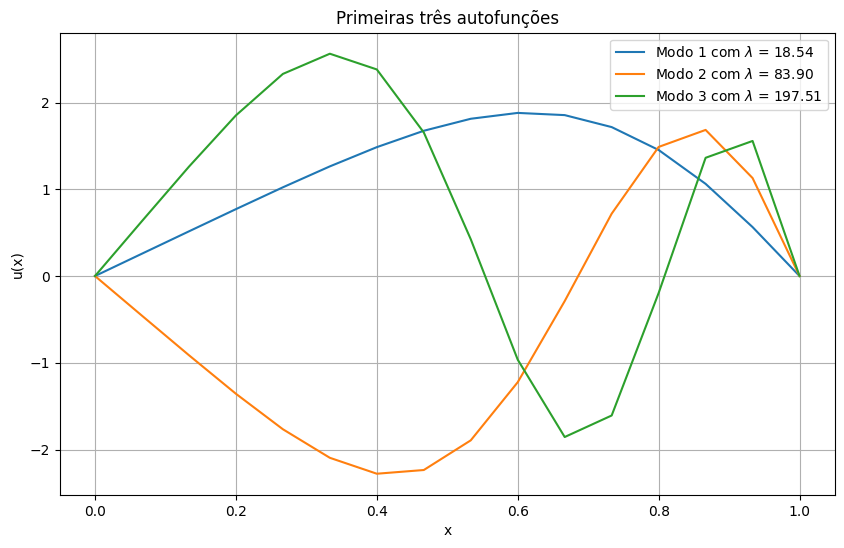

In [17]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def assemble_matrices(n_elements):
    # Tamanho do domínio e número de nós
    L = 1.0
    n_nodes = n_elements + 1
    h = L / n_elements  # Comprimento de cada elemento
    
    # Inicialização das matrizes globais
    K_global = np.zeros((n_nodes, n_nodes))
    M_prime_global = np.zeros((n_nodes, n_nodes))
    
    # Funções de peso para a matriz de massa modificada
    def w_ij(i, j, x):
        # Funções de forma linear
        if i == j:
            return (2 * x**2 * h) / 3
        else:
            return (x**2 * h) / 6
    
    # Loop sobre cada elemento
    for e in range(n_elements):
        node_start = e
        node_end = e + 1
        x_start = h * e
        x_end = h * (e + 1)
        
        # Construção da matriz de rigidez local
        K_local = np.array([[1, -1], [-1, 1]]) * (1/h)
        
        # Adicionando contribuições locais às matrizes globais
        for i in range(2):
            for j in range(2):
                K_global[node_start + i, node_start + j] += K_local[i, j]
                
                # Integral para a matriz de massa modificada é avaliada numericamente
                M_prime_global[node_start + i, node_start + j] += w_ij(i, j, (x_start + x_end) / 2)
    
    # Aplicar condições de contorno
    K_global = K_global[1:-1, 1:-1]
    M_prime_global = M_prime_global[1:-1, 1:-1]
    
    return K_global, M_prime_global

n_elements = 15
K_global, M_prime_global = assemble_matrices(n_elements)

# Solução do problema de autovalores
eigenvalues, eigenvectors = la.eigh(K_global, M_prime_global)

# Plotando as primeiras 3 autofunções
plt.figure(figsize=(10, 6))
x = np.linspace(0, 1, n_elements + 1)
for i in range(3):
    y = np.zeros(n_elements + 1)
    y[1:-1] = eigenvectors[:, i]
    plt.plot(x, y, label=f'Modo {i+1} com $\lambda$ = {eigenvalues[i]:.2f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Primeiras três autofunções')
plt.grid(True)
plt.show()
